In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("supply_chain_data.csv")

df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [ ]:
# Clean column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
# 1. Total Products Sold by Product Type

sales_by_product = df.groupby("product_type")["number_of_products_sold"].sum().reset_index()

fig1 = px.bar(sales_by_product, x="product_type", y="number_of_products_sold", title="Total Products Sold by Product Type")

fig1.show()

# Skincare leads in total units sold.

# Haircare and Cosmetics follow closely.

In [26]:
# 2. Revenue Distribution by Product Type

revenue_by_product = df.groupby("product_type")["revenue_generated"].sum().reset_index()

fig2 = px.pie(revenue_by_product, names="product_type", values="revenue_generated", title="Revenue Distribution by Product Type")

fig2.show()

# Despite high sales, Skicare and Cosmetics contribute significantly to revenue

# Haircare has lower revenue per unit on average

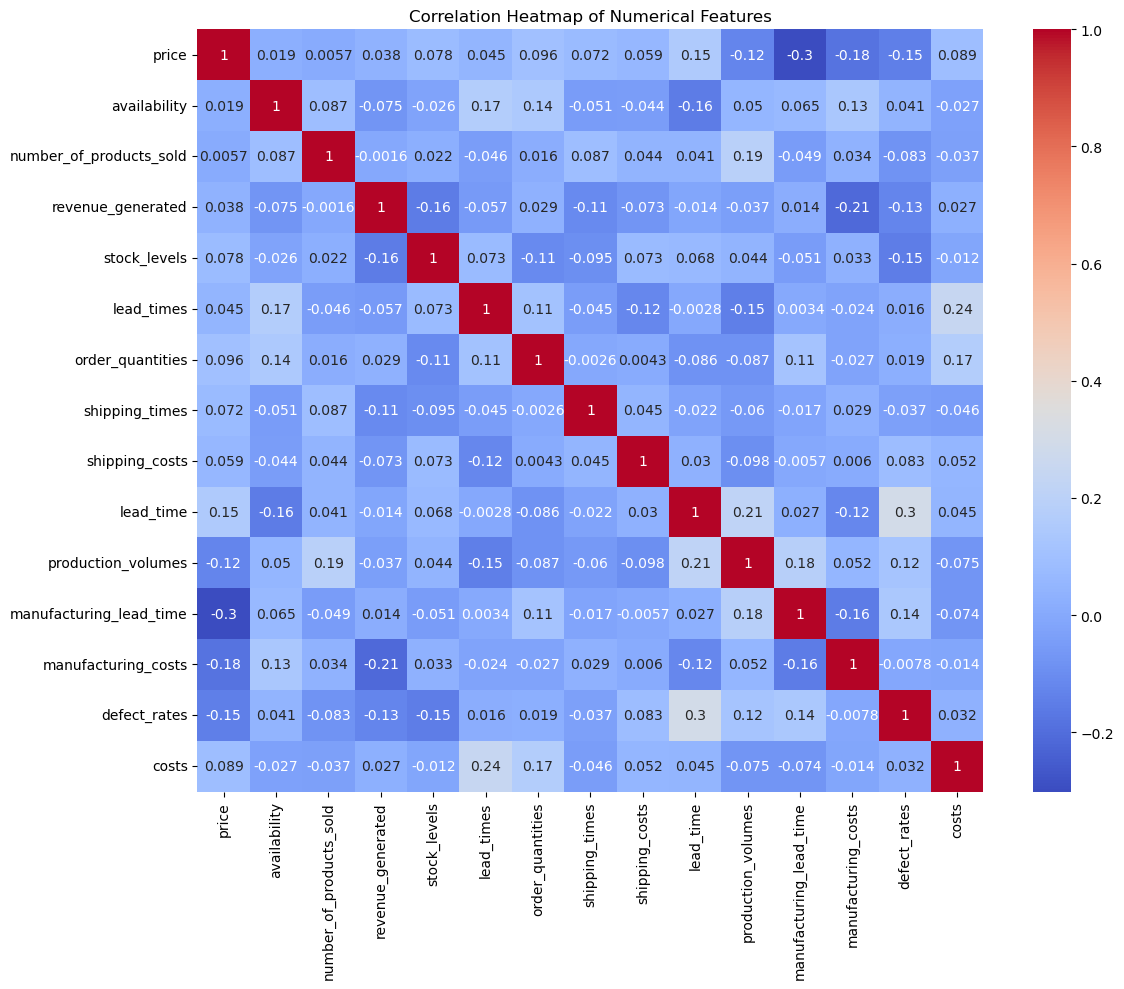

In [29]:
# 3. Correlation Heatmap of Numerical Features

numerical_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# Revenue generated is strongly correlated with:
    # Number of products sold
    # Price
# Manufaturing costs and Production volumes show moderate correlation
# Defect rates have weak correlations with most features, suggesting other factors may influence quality

In [ ]:
# 4. Summary Statistics
print("Summary statistics of numerical features:\n")
print(numerical_cols.describe())

Summary statistics of numerical features:

            price  availability  number_of_products_sold  revenue_generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       stock_levels  lead_times  order_quantities  shipping_times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801       

# Here are some key insights from the numerical data

# Average price: $49.46
# Average revenue per SKU: $5776.05
# Average defect rate: ~2.28%
# Shipping costs range from $1.01 to to $9.93